In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import sklearn.metrics as met

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
print("NULL VALUES",data.isnull().sum())
print("DUPLICATES",data.duplicated().sum())

NULL VALUES RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
DUPLICATES 0


In [ ]:
data = data.drop("RowNumber",axis=1)
data = data.drop("CustomerId",axis=1)
data = data.drop("Surname",axis=1)

In [ ]:
data.loc[data.Gender == 'Male','Gender'] = 0
data.loc[data.Gender == 'Female','Gender'] = 1
data.loc[data.Geography == 'Spain','Geography'] = 0
data.loc[data.Geography == 'France','Geography'] = 1
data.loc[data.Geography == 'Germany','Geography'] = 2

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,0,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,43,2,125510.82,1,1,1,79084.10,0


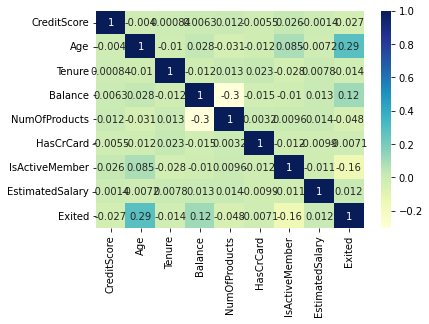

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


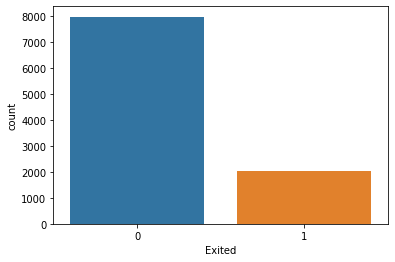

In [ ]:
data['Exited'].value_counts()
g = sns.countplot(data['Exited'])
g.set_xticklabels([0,1])
plt.show()

In [ ]:
class_count_0, class_count_1 = data['Exited'].value_counts()

In [ ]:
class_0 = data[data['Exited'] == 0]
class_1 = data[data['Exited'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (7963, 11)
class 1: (2037, 11)


In [ ]:
X = data.drop("Exited",axis=1)
Y = data["Exited"]

In [ ]:
Standardisation = preprocessing.StandardScaler()
x = Standardisation.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=9)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
prediction1 = model1.predict(X_test)
accuracy1 = model1.score(X_test,Y_test)
Y_pred1 = np.around(prediction1)
print("Accuracy: ",accuracy1)
matrix = confusion_matrix(Y_test,Y_pred1)
print('Confusion matrix : \n',matrix)

Accuracy:  0.8108
Confusion matrix : 
 [[1919   66]
 [ 407  108]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model2 = SVC()
model2.fit(X_train,Y_train)
prediction2 = model2.predict(X_test)
accuracy2 = model2.score(X_test,Y_test)
Y_pred2 = np.around(prediction2)
print("Accuracy: ",accuracy2)
matrix = confusion_matrix(Y_test,Y_pred2)
print('Confusion matrix : \n',matrix)

Accuracy:  0.856
Confusion matrix : 
 [[1934   51]
 [ 309  206]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


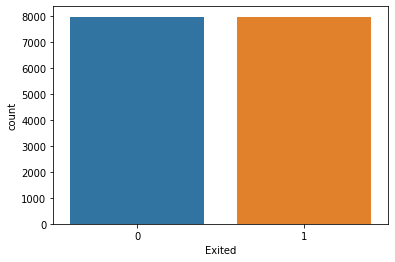

In [ ]:
smote = SMOTE()
X_transformed,Y_transformed=smote.fit_resample(X,Y)
sns.countplot(Y_transformed)

In [ ]:
Standardisation = preprocessing.StandardScaler()
X_transformed = Standardisation.fit_transform(X_transformed)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y_transformed, test_size=0.25, random_state=9)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
prediction1 = model1.predict(X_test)
accuracy1 = model1.score(X_test,Y_test)
Y_pred1 = np.around(prediction1)
print("Accuracy: ",accuracy1)
matrix = confusion_matrix(Y_test,Y_pred1)
print('Confusion matrix : \n',matrix)

Accuracy:  0.7556504269211451
Confusion matrix : 
 [[1457  509]
 [ 464 1552]]


In [ ]:
model2 = SVC(probability=True)
model2.fit(X_train,Y_train)
prediction2 = model2.predict(X_test)
accuracy2 = model2.score(X_test,Y_test)
Y_pred2 = np.around(prediction2)
print("Accuracy: ",accuracy2)
matrix = confusion_matrix(Y_test,Y_pred2)
print('Confusion matrix : \n',matrix)


Accuracy:  0.8437970868910095
Confusion matrix : 
 [[1690  276]
 [ 346 1670]]


In [ ]:
print(met.classification_report(Y_test, Y_pred1, target_names = ['Not Exited','Exited']))

              precision    recall  f1-score   support

  Not Exited       0.76      0.74      0.75      1966
      Exited       0.75      0.77      0.76      2016

    accuracy                           0.76      3982
   macro avg       0.76      0.76      0.76      3982
weighted avg       0.76      0.76      0.76      3982



In [ ]:
print(met.classification_report(Y_test, Y_pred2, target_names = ['Not Exited','Exited']))

              precision    recall  f1-score   support

  Not Exited       0.83      0.86      0.84      1966
      Exited       0.86      0.83      0.84      2016

    accuracy                           0.84      3982
   macro avg       0.84      0.84      0.84      3982
weighted avg       0.84      0.84      0.84      3982



In [ ]:
print("Train Accuracy:",model1.score(X_train, Y_train))
print("Test Accuracy:",model1.score(X_test, Y_test))

Train Accuracy: 0.7593770931011387
Test Accuracy: 0.7556504269211451


In [ ]:
print("Train Accuracy:",model2.score(X_train, Y_train))
print("Test Accuracy:",model2.score(X_test, Y_test))

Train Accuracy: 0.8589249832551908
Test Accuracy: 0.8437970868910095
